In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
all_data = pd.concat([pd.read_csv('kaggle/input/heartbeat/ptbdb_abnormal.csv',header = None), pd.read_csv('kaggle/input/heartbeat/ptbdb_normal.csv',header = None)])
all_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,1.000000,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4042,1.000000,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4043,1.000000,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4044,0.915983,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(all_data, test_size=0.2, shuffle=True)
train_data[187].value_counts()

1.0    8415
0.0    3226
Name: 187, dtype: int64

In [35]:
from scipy import stats

effictive_list = []
for i in train_data.columns:
    if i != 187:
        pearson_coef, p_value = stats.pearsonr(train_data[i], train_data[187])
        effictive_list.append((f'column number : {i}', f'Pearson Correlation {pearson_coef}', f'P-value : {p_value}'))
    else: break

print('*' * 75)
print(max(effictive_list))
print('*' * 75)

***************************************************************************
('column number : 99', 'Pearson Correlation 0.012937708078366632', 'P-value : 0.16277392275868557')
***************************************************************************


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


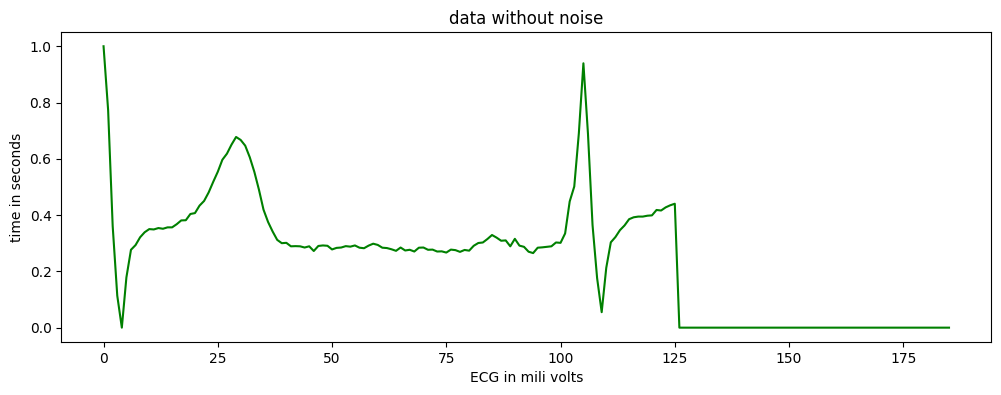

In [36]:
def add_gaussian_noise(signal):
    noise = np.random.normal(0,0.05,186)
    return(signal + noise)
noise_data = add_gaussian_noise(train_data.iloc[0,:186])
plt.figure(figsize = [12,4.02])
plt.plot(train_data.iloc[0,:186], color = 'green')
plt.title('data without noise')
plt.xlabel('ECG in mili volts')
plt.ylabel('time in seconds')
plt.show()

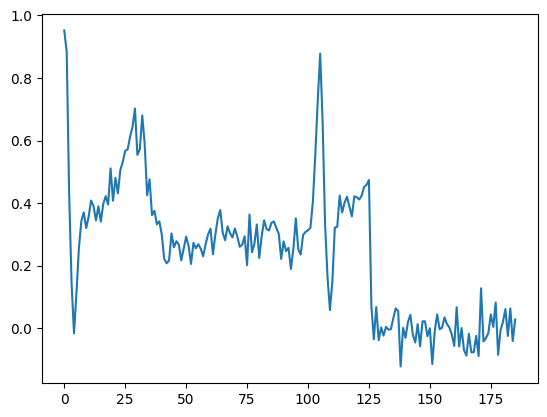

In [37]:
plt.plot(noise_data)

In [38]:
from sklearn.model_selection import train_test_split
X_train = train_data.drop(187, axis=1).values
y_train = train_data[187].values
X_test = test_data.drop(187, axis=1).values
y_test = test_data[187].values
unique, counts = np.unique(y_train, return_counts=True)

pd.DataFrame(np.asarray((unique, counts)).T)

,0,1
0,0.0,3226.0
1,1.0,8415.0


In [39]:
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score

In [45]:
model = XGBClassifier()

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [46]:
y_pred = model.predict(X_test)
print(f'Training Accuracy: {accuracy_score(y_train, model.predict(X_train))}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='micro'))    
print("Precision Score : ",precision_score(y_test, y_pred,  pos_label='positive',average='micro'))     

print(f"Testing F-1:", f1_score(y_test, y_pred, pos_label='positive', average='micro'))

print(f"Testing F-Beta:", fbeta_score(y_test, y_pred, beta=0.5, pos_label='positive', average='micro'))
print('-'*30)

Training Accuracy: 1.0
Testing Accuracy: 0.9790450017176228
Testing Confusion Matrix: 
[[ 783   37]
 [  24 2067]]
Recall Score :  0.9790450017176228
Precision Score :  0.9790450017176228
Testing F-1: 0.9790450017176228
Testing F-Beta: 0.9790450017176228
------------------------------


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classifi

In [42]:
from keras.utils.np_utils import to_categorical
to_categorical(y_pred)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [43]:
to_categorical(y_test)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

Normalized confusion matrix


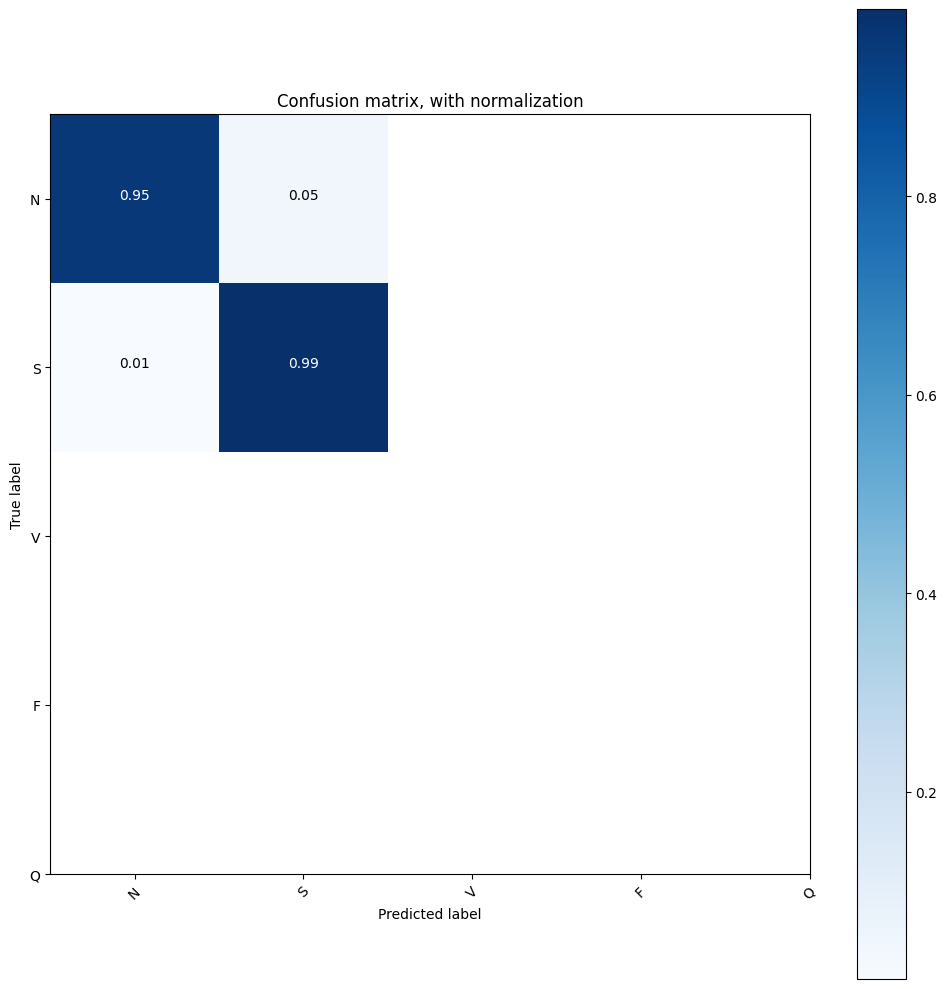

In [44]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(to_categorical(y_test).argmax(axis=1), to_categorical(y_pred).argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()